In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

In [171]:
# Set default visualization parameters

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
sns.set_context("notebook", rc={"font.size":16, "axes.titlesize":20, "axes.labelsize":18})
sns.set(font='Franklin Gothic Book',
rc={'axes.axisbelow': False,
'axes.edgecolor': 'lightgrey',
# 'axes.edgecolor': 'white',
'axes.facecolor': 'None',
'axes.grid': False,
'axes.labelcolor': 'dimgrey',
# 'axes.labelcolor': 'white',
'axes.spines.right': False,
'axes.spines.top': False,
'axes.prop_cycle': plt.cycler(color=color_list),
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
'text.color': 'dimgrey',
# 'text.color': 'white',    
'xtick.bottom': False,
'xtick.color': 'dimgrey',
# 'xtick.color': 'white',    
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'dimgrey',
# 'ytick.color': 'white',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})
%matplotlib inline

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [172]:
aisles = pd.read_csv(r"C:\Users\Echlon Defence\Downloads\grocery\archive (24)\aisles.csv")
departments = pd.read_csv(r"C:\Users\Echlon Defence\Downloads\grocery\archive (24)\departments.csv")
order_products_prior = pd.read_csv(r"C:\Users\Echlon Defence\Downloads\grocery\archive (24)\order_products__prior.csv")
order_products_train = pd.read_csv(r"C:\Users\Echlon Defence\Downloads\grocery\archive (24)\order_products__train.csv")
orders = pd.read_csv(r"C:\Users\Echlon Defence\Downloads\grocery\archive (24)\orders.csv")
products = pd.read_csv(r"C:\Users\Echlon Defence\Downloads\grocery\archive (24)\products.csv")  


In [173]:

order_products_prior = order_products_prior.iloc[:-31934369]
order_products_train = order_products_train.iloc[:-1184407]
orders = orders.iloc[:-3080583]
products = products.iloc[:-44000]

In [174]:
print("aisles: ", aisles.shape)
print("departments: ", departments.shape)
print("order_products_prior: ", order_products_prior.shape)
print("order_products_train: ", order_products_train.shape)
print("orders: ", orders.shape)
print("products: ", products.shape)

aisles:  (134, 2)
departments:  (21, 2)
order_products_prior:  (500120, 4)
order_products_train:  (200210, 4)
orders:  (340500, 7)
products:  (5688, 4)


### Checking for Nan values

Data is very clean. Nan values in orders.days_since_prior_order, but they are valid.

In [175]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [176]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [177]:
products.isna().sum() 

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [178]:
order_products_prior.isna().sum()  


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [179]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [180]:
orders.isna().sum()

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20620
dtype: int64

In [181]:
orders.days_since_prior_order.value_counts()
# Nothing greater than 30 here so it must actually be '30+'

days_since_prior_order
30.0    36697
7.0     31765
6.0     23684
4.0     22102
3.0     21674
5.0     21235
2.0     19731
8.0     17770
1.0     14531
9.0     11713
14.0    10019
10.0     9581
13.0     8276
11.0     8197
12.0     7607
15.0     6535
0.0      6437
16.0     4700
21.0     4528
17.0     3946
20.0     3916
18.0     3613
19.0     3415
22.0     3239
28.0     2588
23.0     2357
27.0     2231
24.0     2050
26.0     1972
25.0     1904
29.0     1867
Name: count, dtype: int64

In [182]:
orders.head()
# order_id is a unique key for the order
# order_number is specific to a user
# seems like for any user, order 1 will have a Nan in days_since_prior_order since it is their first order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [183]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [184]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

### Analyze 'Products'
  
49688 unique products 

In [185]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [186]:
print(len(products))
print(products.aisle_id.nunique())
print(products.department_id.nunique())

5688
134
21


In [187]:
# How many products in each department and aisle?
# I guess these would be better/more informative with aisle and dept names
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


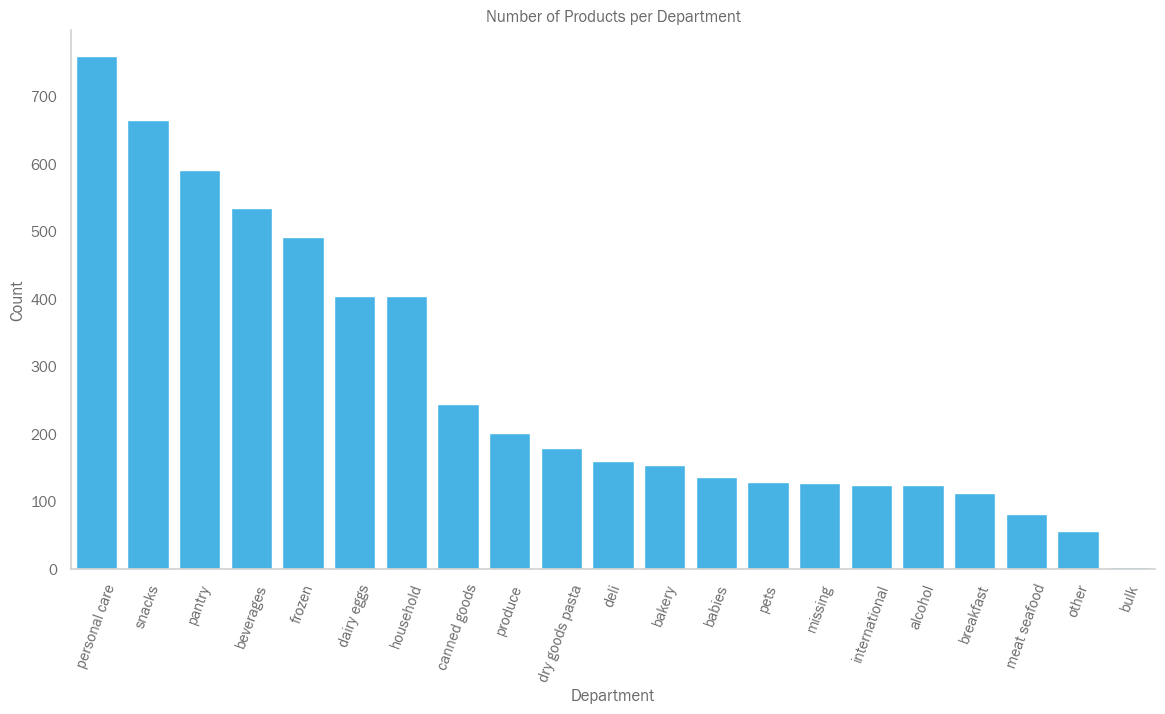

In [188]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')
plt.savefig('Images/products_by_department.png');

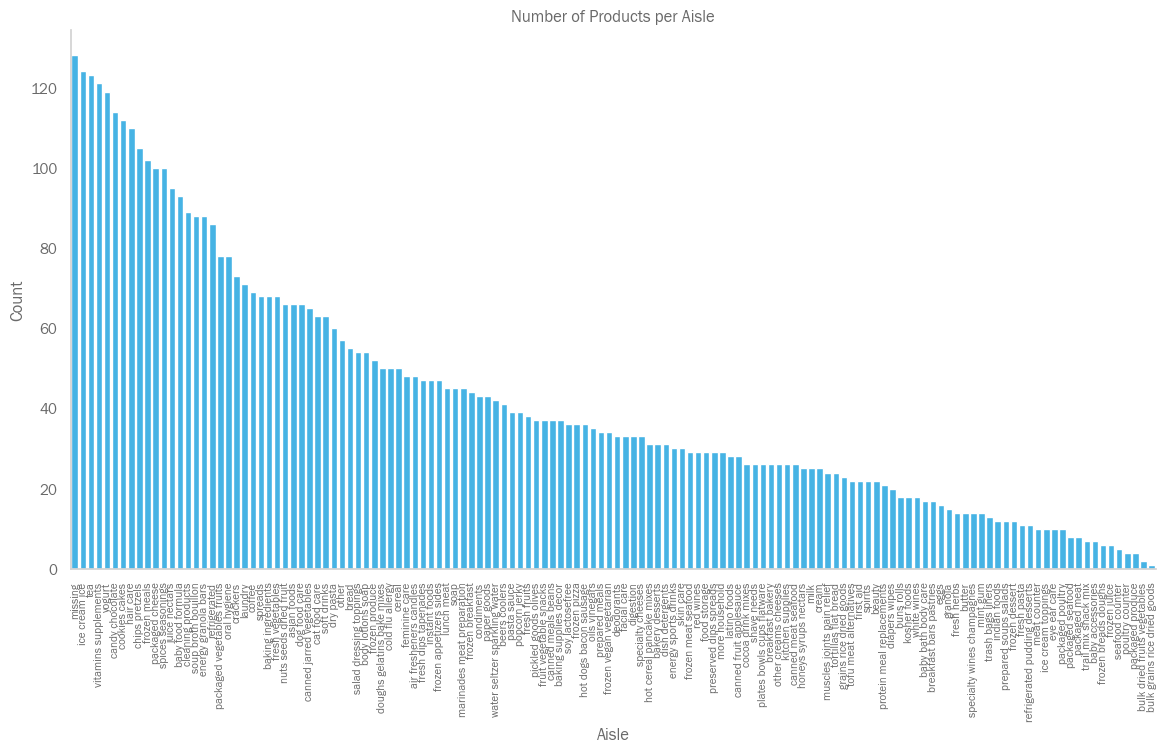

In [189]:
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= products_desc, order = products_desc.aisle.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.savefig('Images/products_by_aisle.png');
# Uh oh, 'missing' is our most popular aisle
# And I see there is a 'missing' value for department above as well

In [190]:
products_desc[products_desc['aisle']=='missing']
# It appears that 1258 products have 'missing' aisle 100 and department 21

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
5343,5344,POW! Pasta Meals Power Protein Complete Meal I...,100,21,missing,missing
5402,5403,White Paper Towels Giant Rolls,100,21,missing,missing
5428,5429,Shrimp Egg Roll,100,21,missing,missing
5550,5551,Butternut Squash Chunks,100,21,missing,missing


In [191]:
# Just confirming the one to many relationship between department and aisle
products_desc[products_desc['department']=='snacks']

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
15,16,Mint Chocolate Flavored Syrup,103,19,ice cream toppings,snacks
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,energy granola bars,snacks
31,32,Nacho Cheese White Bean Chips,107,19,chips pretzels,snacks
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers,snacks
...,...,...,...,...,...,...
5658,5659,Herb Popcorn,23,19,popcorn jerky,snacks
5663,5664,Lucky Candy Bar,45,19,candy chocolate,snacks
5664,5665,Original Soft & Chewy Candy,45,19,candy chocolate,snacks
5668,5669,Sunflower Kernels Roasted & Salted,117,19,nuts seeds dried fruit,snacks


In [192]:
# An aisle only belongs to one department
products_desc[products_desc['aisle_id']==45]

,product_id,product_name,aisle_id,department_id,aisle,department
123,124,Sun Cups Dark Chocolate,45,19,candy chocolate,snacks
135,136,Simple,45,19,candy chocolate,snacks
183,184,Kisses Milk Chocolate Candy,45,19,candy chocolate,snacks
206,207,Minis Candy Bars,45,19,candy chocolate,snacks
226,227,Triple Chocolate Snack Size,45,19,candy chocolate,snacks
...,...,...,...,...,...,...
5253,5254,Milk Chocolate Sea Salt Cashew,45,19,candy chocolate,snacks
5425,5426,"Chocolate, 40%, Creamy Milk",45,19,candy chocolate,snacks
5439,5440,Twin Cookie Bars,45,19,candy chocolate,snacks
5663,5664,Lucky Candy Bar,45,19,candy chocolate,snacks


In [193]:
pickle.dump(products_desc, open(r"C:\Users\Echlon Defence\Downloads\grocery\Pickle/products_desc.p", "wb"))

### Analyze Orders

In [194]:
print(len(orders))
print(orders.order_id.min())
print(orders.order_id.max())

340500
8
3421068


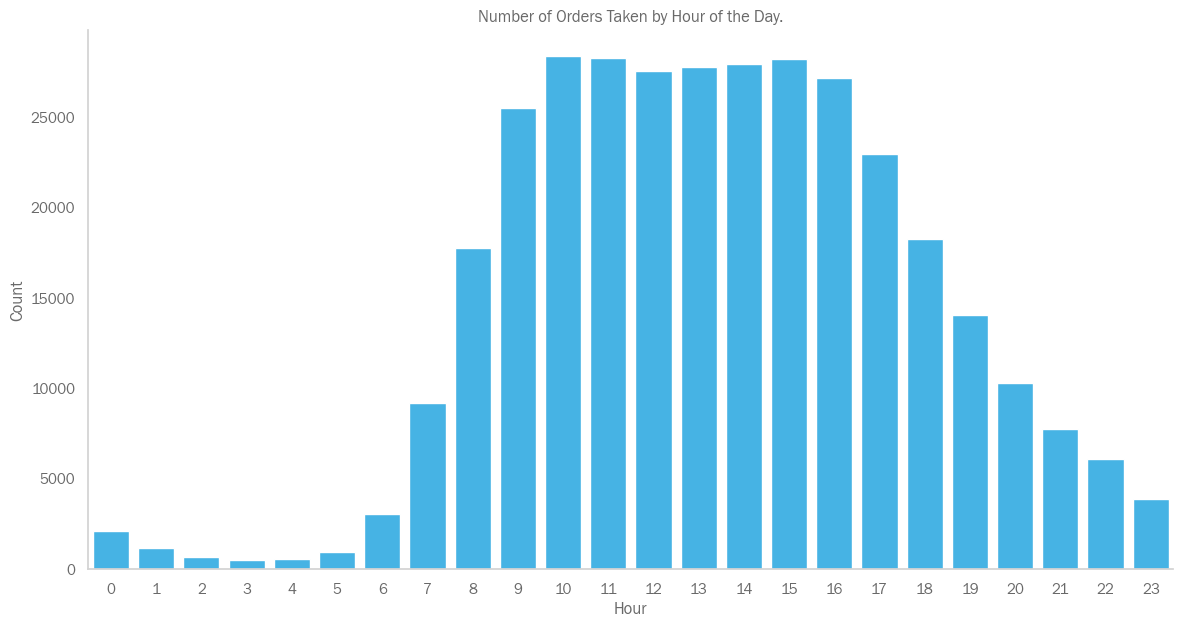

In [195]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title('Number of Orders Taken by Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.savefig('Images/orders_by_hour.png');

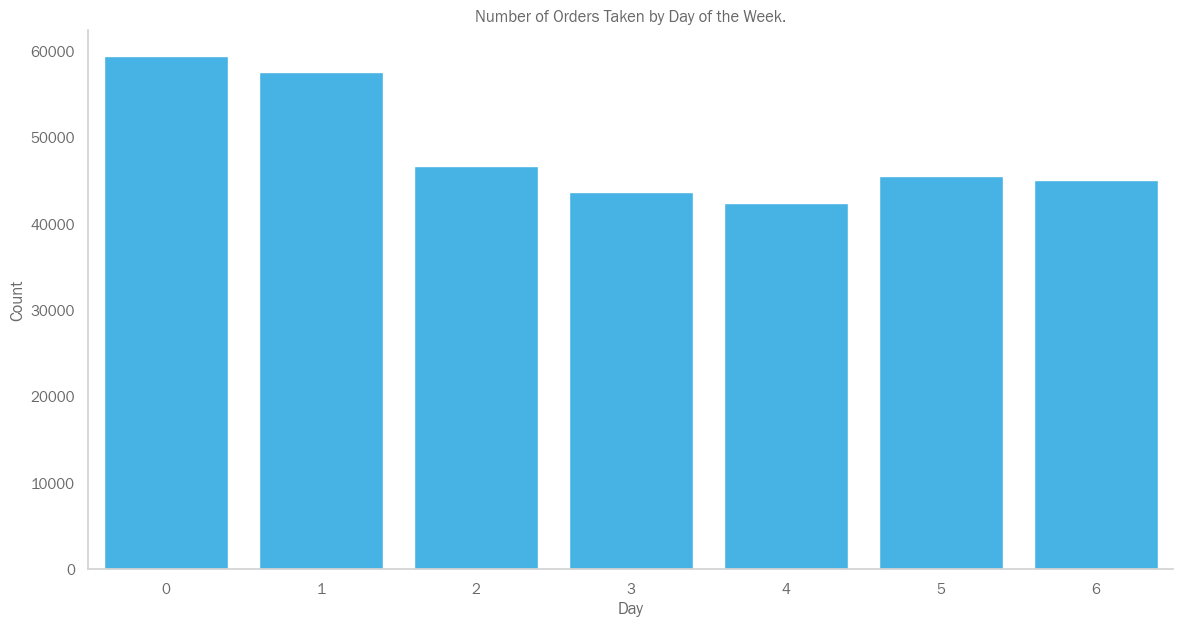

In [196]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')
plt.savefig('Images/orders_by_dow.png');

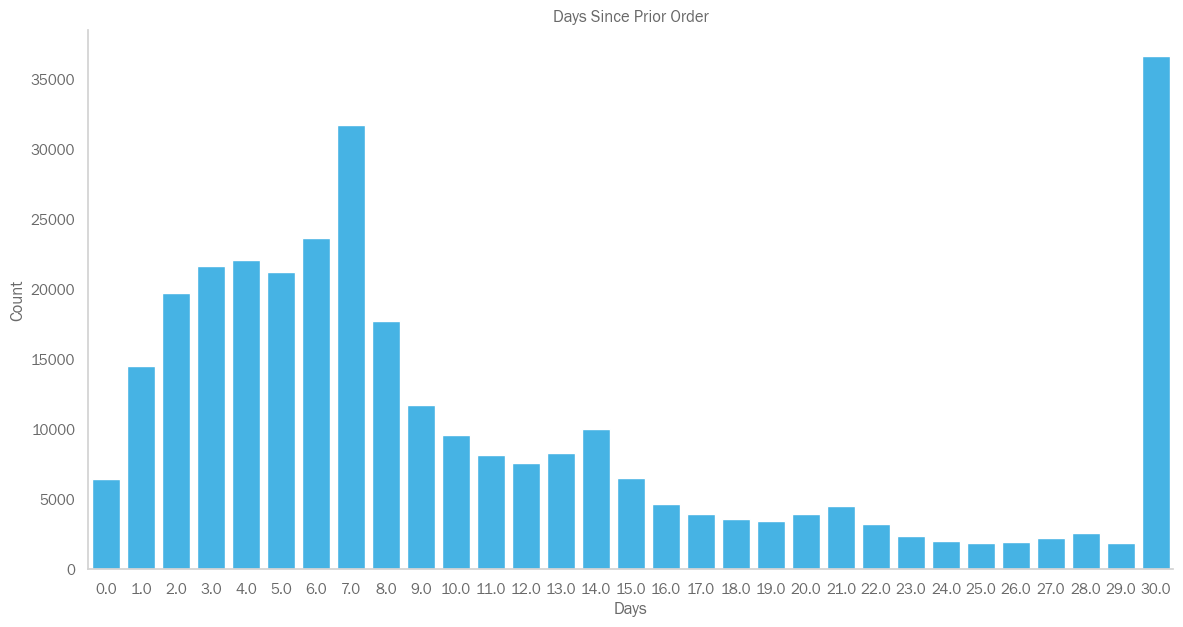

In [197]:
plt.figure(figsize = (14,7))
sns.countplot(x='days_since_prior_order', data= orders)
plt.title('Days Since Prior Order')
plt.ylabel('Count')
plt.xlabel('Days')
plt.savefig('Images/days_since_order.png');

# Spikes at 7, 14, 21, and 28 indicate people who reorder weekly, or every 2 or three weeks but on the same day
# Does 0.0 days mean someone ordered twice in the same day?
# Surprising how many people order more than once a week
# 30 does seem to indicate 30 or more days since last order

In [198]:
orders.head(15)
# Appears to be sorted by user_id and then order_number
# Most recent order_number per user_id is in the train(or test) set, others in prior
# First order per user has NaN in days_since

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [199]:
orders.sort_values('order_id') # Just checking that it has all the order_ids starting at 1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
50028,8,3107,prior,5,4,6,17.0
301075,14,18194,prior,49,3,15,3.0
6226,40,382,prior,29,1,15,23.0
181364,46,10951,prior,3,0,18,18.0
203316,61,12295,prior,2,1,9,7.0
...,...,...,...,...,...,...,...
260980,3420996,15818,train,16,1,9,7.0
239983,3421006,14516,prior,3,0,12,7.0
138141,3421007,8304,prior,14,0,12,7.0
152409,3421024,9166,prior,1,3,12,NaN


In [200]:
orders_test = orders[orders['eval_set']=='test'] # 75000 orders in our test set
# So basically for these test orders, I don't have the answers.  I don't know what products were ordered.
# If I do market basket analysis I will get to these
orders_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
340335,2970557,20612,test,16,1,13,13.0
340343,3309313,20613,test,8,4,9,30.0
340385,975875,20614,test,42,5,13,18.0
340398,578572,20615,test,13,0,10,3.0


In [201]:
orders[orders['user_id']==3] # But I have all of this user's order/products in prior

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


### Analyze Order_products_train and _prior

In [202]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [203]:
print(len(order_products_train)) # Has 1,384,617 order/products
print(order_products_train.order_id.min()) # starts with order number 1
print(order_products_train.order_id.max())
print(order_products_train.order_id.nunique()) # Has 131,209 unique orders

200210
1
490479
18949


In [204]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [205]:
print(len(order_products_prior)) # Has 32,434,489 order/products
print(order_products_prior.order_id.min()) # starts with order number 2
print(order_products_prior.order_id.max())
print(order_products_prior.order_id.nunique()) # Has 3,214,874 unique orders

500120
2
52897
49639


In [206]:
order_products_prior[order_products_prior.order_id == 2]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [207]:
orders[orders.order_id == 2]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [208]:
orders[orders.user_id == 202279]
# This user's third order was order number 2.  Need to be sure not to think order_id is chronological.

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [209]:
order_products_train[order_products_train.order_id == 1050357]

,order_id,product_id,add_to_cart_order,reordered


In [210]:
# So what do I know about this user...

# They have ordered 9 times.
len(orders[orders.user_id == 202279])

0

In [211]:
# They usually order on day 5 (presumably Friday)
orders[orders.user_id == 202279].order_dow.mode()

Series([], Name: order_dow, dtype: int64)

In [212]:
# They average 22.6 days between orders
orders[orders.user_id == 202279].days_since_prior_order.mean()

nan

In [213]:
# They order around 11:30 am.
orders[orders.user_id == 202279].order_hour_of_day.mean()

nan

In [214]:
# These are their order numbers
list(orders[orders.user_id == 202279]['order_id'].values)

[]

In [215]:
# But what products have they ordered... merging tables will help here
order_products_prior[order_products_prior['order_id'].isin(list(orders[orders.user_id == 202279]['order_id'].values))]

,order_id,product_id,add_to_cart_order,reordered


## Data Preprocessing

### Merge order_products together

Output: merged_order_products, order_products_desc

In [216]:
print(len(order_products_train))
print(len(order_products_prior))

200210
500120


In [217]:
# The dataframe of all order products should be the length of these two together
len(order_products_train)+len(order_products_prior)

700330

In [218]:
# These two dataframes shouldn't have any overlap.  I need an outer join to merge them together.
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')
merged_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,10246,3,0
1,1,11109,2,1
2,1,13176,6,0
3,1,22035,8,1
4,1,43633,5,1


In [219]:
len(merged_order_products)

700330

In [220]:
products_per_order = merged_order_products.groupby('order_id').count()

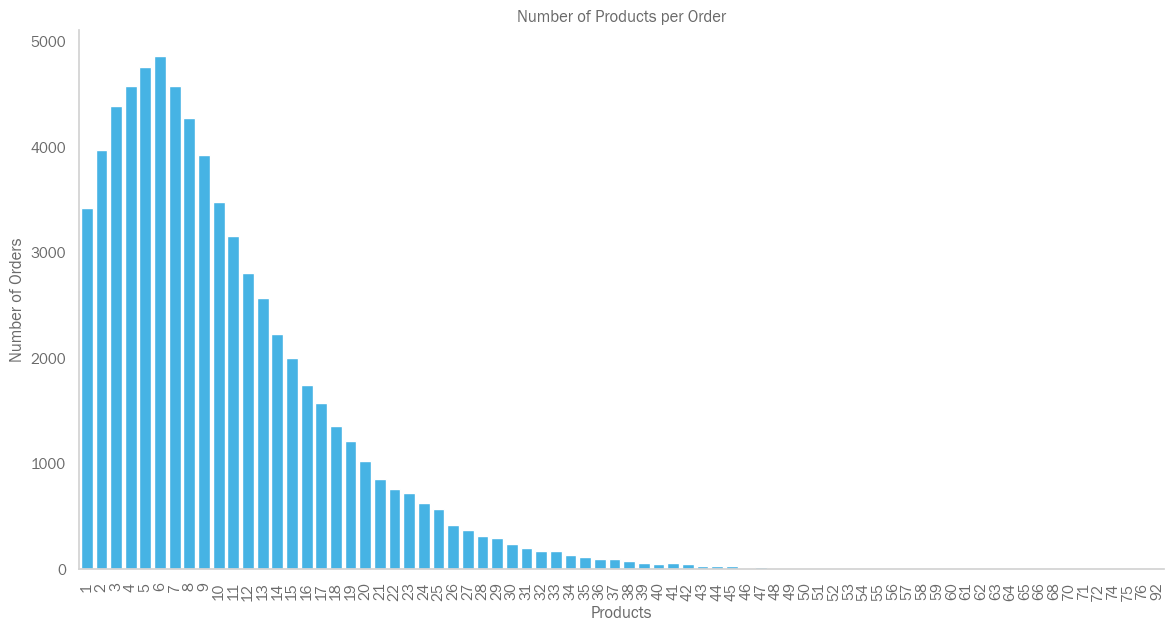

In [221]:
# 5 is the most common number of products per order

plt.figure(figsize = (14,7))
sns.countplot(x='product_id', data = products_per_order)
plt.title('Number of Products per Order')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Products')
plt.savefig('Images/product_count_by_order.png');

In [222]:
# This has an entry for each ordered product.  If we combine it with aisle and department we can see which products
# are ordered the most.
order_products_desc = pd.merge(merged_order_products, products_desc, on = 'product_id')
order_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
1,9,432,13,1,Vanilla Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
2,9,2014,4,1,Low Fat Kefir Cultured Milk Smoothie Lowfat Pr...,120,16,yogurt,dairy eggs
3,9,3990,14,1,Natural Sharp Cheddar Sliced Cheese,21,16,packaged cheese,dairy eggs
4,10,1529,6,0,"Parsley, Italian (Flat), New England Grown",16,4,fresh herbs,produce


In [223]:
# Very cool.  People really like their bananas.
order_products_desc['product_name'].value_counts()

product_name
Seedless Red Grapes                                         1833
Yellow Onions                                               1632
100% Whole Wheat Bread                                      1226
Small Hass Avocado                                          1208
100% Raw Coconut Water                                       768
                                                            ... 
Grape Jammers                                                  1
Air Effects With Gain Original Scent Air Freshener Spray       1
Prunes in 60 Smart Calorie Packs                               1
Natural Odor Eliminating Air Freshener Lemon Raspberry         1
Spinach Pesto                                                  1
Name: count, Length: 3706, dtype: int64

### Merge user orders

Output: merged_orders

In [224]:
# Now merge the orders with the ordered prodcuts, combining on order_id
# This is a lot of info. We will trim some out before modeling.
merged_orders = pd.merge(orders, order_products_desc, on = 'order_id')
merged_orders.head() # Because the products showing are from the 1st order for this user, they all have Nan in days_since
# Because pd.merge defaults to an inner join, the test orders are not in this dataframe because they had no products.

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,23391,7,prior,17,0,10,28.0,4920,6,1,Seedless Red Grapes,123,4,packaged vegetables fruits,produce
1,23391,7,prior,17,0,10,28.0,4945,7,1,Large Pineapple Chunks,123,4,packaged vegetables fruits,produce
2,8382,23,prior,2,0,10,9.0,3108,6,0,Original Lowfat Lemon Burst Yogurt,120,16,yogurt,dairy eggs
3,8382,23,prior,2,0,10,9.0,3873,1,0,Mountain Spring Water,115,7,water seltzer sparkling water,beverages
4,8382,23,prior,2,0,10,9.0,3919,9,0,Hearty Grains 100% Whole Wheat English Muffins,93,3,breakfast bakery,bakery


In [225]:
len(merged_orders)

6863

In [226]:
merged_orders[merged_orders['user_id']==3] # We see 12 orders, 88 products, no test order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department


In [227]:
orders[orders['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [228]:
# Creating the test set of orders
test = orders[orders['eval_set']=='test']
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [229]:
# Now I can see everything a particular user has ordered, and how often
merged_orders[merged_orders['user_id']==3]['product_name'].value_counts()

Series([], Name: count, dtype: int64)

In [230]:
pickle.dump(merged_orders, open("Pickle/merged_orders.p", "wb"))

## Clustering

See separate notebook

## Surprise recommendation model

The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine.

### Prepare data for recommendation system

In [231]:
# Ok so I need user_id, product_id, and 'number of times it was purchased'
user_item = merged_orders[['user_id', 'product_id', 'reordered']] # Maybe I can use the reordered flag to increment

In [232]:
# About 20 million duplicates.  That is a person ordering an item more than once.
user_item[user_item.duplicated(subset = ['user_id', 'product_id'], keep = 'first')]

,user_id,product_id,reordered
25,110,4957,1
57,187,3957,1
64,210,4920,1
69,210,4799,1
70,210,4920,1
...,...,...,...
6774,20371,1831,1
6820,20498,5024,1
6822,20498,5024,1
6823,20498,5024,1


In [233]:
# Ah this is what I need.  The value counts of each product id for each user.

user_item[user_item['user_id']==1].product_id.value_counts()

Series([], Name: count, dtype: int64)

In [234]:
# Started at 8:51pm, ended 11:13pm

# Creates list of data tuples of user, product, count

data=[]
data_columns=['user_id','product_id','count']
for user in user_item.user_id.unique():
     counts = user_item[user_item['user_id']==user].product_id.value_counts()
     for i in range(len(counts)):
         data.append([user, counts.index[i], counts.values[i]])

In [235]:
# Began 11:13pm, ended 11:24

# Makes dataframe for recommender

# Now I am consolidated down to 13.8 million rows

rec_df = pd.DataFrame(data, columns=data_columns)

rec_df

,user_id,product_id,count
0,7,4920,1
1,7,4945,1
2,23,3108,1
3,23,3873,1
4,23,3919,1
...,...,...,...
6574,20591,3849,1
6575,20591,3957,1
6576,20591,4029,1
6577,20602,3693,1


In [236]:
pickle.dump(rec_df, open("Pickle/rec_df.p", "wb"))

In [237]:
rec_df = pickle.load(open("Pickle/rec_df.p", "rb"))
len(rec_df)

6579

In [238]:
rec_df[rec_df['user_id']==1]

,user_id,product_id,count


In [239]:
#  Hmm. No one bought anything more than 100 times.  Is that coincidental?

rec_df['count'].max()

4

In [240]:
# 8.3 million user/product combinations happened only once

rec_df['count'].value_counts()

count
1    6323
2     233
3      18
4       5
Name: count, dtype: int64

In [241]:
# In case I want a smaller subset of users I'll build users_150K
# But I wonder if pulling out items only ordered once or users who only ordered once would be better

users_150K = rec_df[rec_df['user_id'] < 150000]

In [242]:
# Might be better by eliminating users with few products ordered instead of few orders
# Grouped_users is fromm the clustering notebook
# Need to recalculate this
grouped_users = pickle.load(open("Pickle/grouped_users.p", "rb"))
grouped_users[grouped_users['num_orders']<=5] # 49000 users with 5 or fewer orders

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
23,2,0,10.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
42,3,1,19.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,2,1,13.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,5,5,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,4,0,14.0,30.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20482,2,0,18.0,21.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20499,4,3,14.0,21.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20522,2,2,9.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
products_with_count = rec_df.groupby('product_id').sum().drop(columns='user_id').sort_values(by='count')
products_with_count[products_with_count['count']<=5]  # 2741 products ordered 5 times or less

,count
product_id,
2722,1
2971,1
2977,1
2983,1
2984,1
...,...
1935,5
3628,5
5566,5


### Modeling a recommendation system

In [244]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy

In [246]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 100))

# The columns must correspond to user id, item id and ratings (in that order).
rec_data = Dataset.load_from_df(rec_df, reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(rec_data, test_size=.25, random_state=12)

In [247]:
# Start with a memory-based model

# These just take up too much memory for the size of my data.  Moving on to model-based.

sim_cos = {'name':'cosine', 'user_based':False}

tic = time.time()

basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)

Computing the cosine similarity matrix...
Done computing similarity matrix.
fit  0.018586397171020508


In [248]:
# Can't believe I got this to work on the whole data set

tic = time.time()

svd_algo = SVD() 
print(svd_algo)

svd_algo.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

svd_algo_predictions = svd_algo.test(testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(svd_algo_predictions)

# 3.46 RMSE on a scale of 1-100 is pretty darn good, but my data is so skewed it may be misleading.

fit  0.027994394302368164
pred  0.007619380950927734
RMSE: 0.2380


0.23795976046464623

In [249]:
pickle.dump(svd_algo, open(r"Pickle/svd_algo.p", "wb"))

In [250]:
 pickle.dump(svd_algo_predictions, open("Pickle/svd_algo_predictions.p", "wb"))

In [251]:
svd_algo = pickle.load(open("Pickle/svd_algo.p", "rb"))

In [252]:
svd_algo_predictions = pickle.load(open("Pickle/svd_algo_predictions.p", "rb"))

In [253]:
accuracy.rmse(svd_algo_predictions)

RMSE: 0.2380


0.23795976046464623

In [254]:
# Picking a random user to look at one of their ratings

rec_df[rec_df['user_id'] == 196]

,user_id,product_id,count


In [255]:
uid=196
iid=13176
# actual value was 2, prediction is 1.77
pred = svd_algo.predict(uid, iid, r_ui=2, verbose=True)

user: 196        item: 13176      r_ui = 2.00   est = 1.04   {'was_impossible': False}


In [256]:
# Examining the first record in my test set for its actual value
testset[0]

(4611, 4210, 1.0)

In [257]:
# Prediction is 1.15
pred = svd_algo.predict(127895, 6101, r_ui=2, verbose=True)

user: 127895     item: 6101       r_ui = 2.00   est = 1.04   {'was_impossible': False}


In [258]:
svd_algo_predictions[0]

Prediction(uid=4611, iid=4210, r_ui=1.0, est=1.1309252560271053, details={'was_impossible': False})

### Perform a grid search

In [259]:
# Started at 6:45pm, ended at 9:30

param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs = -1, joblib_verbose=5)
gs_model.fit(rec_data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  58 out of  80 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  80 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.5s finished


In [260]:
pickle.dump(gs_model, open("Pickle/gs_model.p", "wb"))

In [261]:
gs_model = pickle.load(open("Pickle/gs_model.p", "rb"))

In [262]:
gs_model.best_params

{'rmse': {'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.6},
 'mae': {'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.6}}

In [263]:
results_df = pd.DataFrame.from_dict(gs_model.cv_results)

In [264]:
# Creating the model from the best params

tic = time.time()

svd_best_gs = SVD(n_factors = 100, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

svd_best_gs.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

svd_best_gs_predictions = svd_best_gs.test(testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(svd_best_gs_predictions)

# RMSE went down on grid search model from 3.4616 to 3.2483

fit  0.023819446563720703
pred  0.0042955875396728516
RMSE: 0.2375


0.2375030742651871

### Try a different rating scale

In [265]:
# I am curious how the model predicts one of the items purchased 100 times

max(testset,key=lambda item:item[2])

(6801, 310, 4.0)

In [266]:
# This one was predicted to be 22.27, that's pretty far off

pred = svd_best_gs.predict(41356,38652, r_ui=100.0, verbose=True)

user: 41356      item: 38652      r_ui = 100.00   est = 1.04   {'was_impossible': False}


In [267]:
# What is my highest prediction?  53.221 on a true rating of 96

# It seems like the model gets worse for higher ratings

top_est = 0
top_pred = [0,0,0,0]
for uid, iid, true_r, est, _ in svd_best_gs_predictions:
    if est > top_est:
        top_est = est
        top_pred = [uid,iid,true_r,est]
top_pred        

[16113, 1443, 1.0, 1.4019710094929607]

In [268]:
# Perhaps I can convert into a rating on a 1 to 5 scale
rec_df['count'].value_counts()

count
1    6323
2     233
3      18
4       5
Name: count, dtype: int64

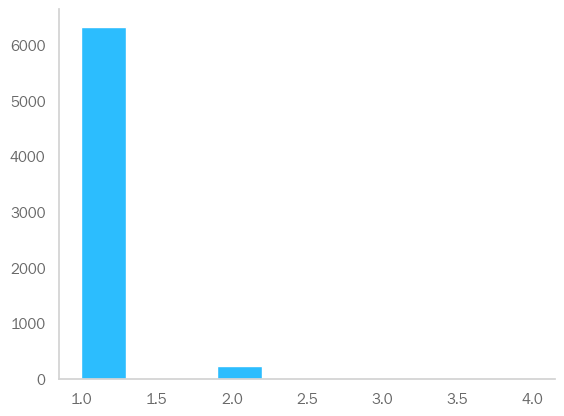

In [269]:
plt.hist(rec_df['count']);

In [270]:
# Well I'm not sure if this is the best way, but there are so few above 5 I think I can group them all together
rec_df['rating'] = rec_df['count'].apply(lambda x: 5 if (x >= 5) else x)

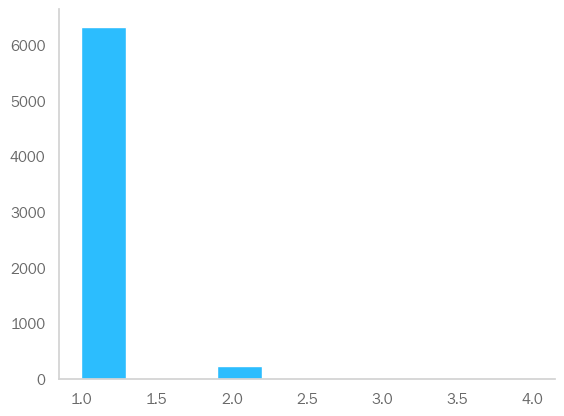

In [271]:
plt.hist(rec_df['rating']);

In [272]:
new_rec_df = rec_df.drop(columns='count')
new_rec_df.tail()

,user_id,product_id,rating
6574,20591,3849,1
6575,20591,3957,1
6576,20591,4029,1
6577,20602,3693,1
6578,20617,1940,2


In [273]:
pickle.dump(new_rec_df, open("Pickle/new_rec_df.p", "wb"))

In [274]:
new_rec_df = pickle.load(open("Pickle/new_rec_df.p", "rb"))

In [275]:
new_rec_df

,user_id,product_id,rating
0,7,4920,1
1,7,4945,1
2,23,3108,1
3,23,3873,1
4,23,3919,1
...,...,...,...
6574,20591,3849,1
6575,20591,3957,1
6576,20591,4029,1
6577,20602,3693,1


In [276]:
# Passing pieces of dataframe in FLASK to be put back together there
pickle.dump(new_rec_df.columns.values,open('Pickle/rec_columns.p','wb'))
pickle.dump(new_rec_df.index.values, open('Pickle/rec_index.p', 'wb'))
pickle.dump(new_rec_df.user_id.values, open('Pickle/rec_user.p', 'wb'))
pickle.dump(new_rec_df.rating.values, open('Pickle/rec_rating.p', 'wb'))
pickle.dump(new_rec_df.product_id.values, open('Pickle/rec_prod_id.p', 'wb'))

In [277]:
rec_columns = pickle.load(open('Pickle/rec_columns.p','rb'))
rec_index = pickle.load(open('Pickle/rec_index.p', 'rb'))
rec_user = pickle.load(open('Pickle/rec_user.p', 'rb'))
rec_rating = pickle.load(open('Pickle/rec_rating.p', 'rb'))
rec_prod_id = pickle.load(open('Pickle/rec_prod_id.p', 'rb'))

In [278]:
new_df = pd.DataFrame(np.column_stack([rec_user, rec_prod_id, rec_rating]), index=rec_index, columns=rec_columns)

In [279]:
new_df

,user_id,product_id,rating
0,7,4920,1
1,7,4945,1
2,23,3108,1
3,23,3873,1
4,23,3919,1
...,...,...,...
6574,20591,3849,1
6575,20591,3957,1
6576,20591,4029,1
6577,20602,3693,1


In [280]:
# Must start with a new reader

tic = time.time()
reader = Reader(rating_scale=(1, 5))
readtime = time.time()-tic
print(readtime)
# The columns must correspond to user id, item id and ratings (in that order).
toc = time.time()
new_rec_data = Dataset.load_from_df(new_rec_df, reader)
loadtime = time.time()-toc
print(loadtime)
# sample random trainset and testset
# test set is made of 25% of the ratings.
tac = time.time()
new_trainset, new_testset = train_test_split(new_rec_data, test_size=.25, random_state=12)
splittime = time.time()-tac
print(splittime)

0.0
0.0
0.015688180923461914


In [281]:
pickle.dump(reader, open("Pickle/reader.p", "wb"))

In [282]:
# Might as well start with the best params from the last model

tic = time.time()

new_svd_algo = SVD(n_factors = 100, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

new_svd_algo.fit(new_trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

new_predictions = new_svd_algo.test(new_testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(new_predictions)

# Not bad, RMSE went to to 1.2649'''

fit  0.02571702003479004
pred  0.005580425262451172
RMSE: 0.2384


0.23835196283717522

In [283]:
pickle.dump(new_svd_algo, open("Pickle/new_svd_algo.p", "wb"))

In [284]:
pickle.dump(new_predictions, open("Pickle/new_predictions.p", "wb"))

In [285]:
new_svd_algo = pickle.load(open(r"Pickle/new_svd_algo.p", "rb"))

In [286]:
new_predictions = pickle.load(open("Pickle/new_predictions.p", "rb"))

In [287]:
accuracy.rmse(new_predictions)

RMSE: 0.2384


0.23835196283717522

In [288]:
# This prediction was 1.76 before, it has gone up to 2.12 with the new scale

uid=196
iid=13176
# get a prediction for specific users and items.
pred = new_svd_algo.predict(uid, iid, r_ui=2, verbose=True)

user: 196        item: 13176      r_ui = 2.00   est = 1.04   {'was_impossible': False}


In [289]:
# This estimate was 1.498 before and now it is 1.475

new_predictions[0]

Prediction(uid=4611, iid=4210, r_ui=1.0, est=1.1014987542273253, details={'was_impossible': False})

In [290]:
# this one was 100 on the last scale but predicted as 21.59
# now it is a 5 on the new scale and predicted at 3.21

pred = new_svd_algo.predict(41356,38652, r_ui=5.0, verbose=True)

user: 41356      item: 38652      r_ui = 5.00   est = 1.04   {'was_impossible': False}


In [291]:
# Well lets try another grid search

# Started at 9:57am, ended at 12:30pm

param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
new_gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs = -1, joblib_verbose=5)
new_gs_model.fit(new_rec_data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  80 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  80 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished


In [292]:
pickle.dump(new_gs_model, open(r"Pickle/new_gs_model.p", "wb"))

In [293]:
new_gs_model = pickle.load(open("Pickle/new_gs_model.p", "rb"))

In [294]:
new_gs_model.best_params

{'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4},
 'mae': {'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6}}

In [295]:
new_results_df = pd.DataFrame.from_dict(new_gs_model.cv_results)

In [296]:
# Creating the model from the best params

tic = time.time()

new_svd_best_gs = SVD(n_factors = 20, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

new_svd_best_gs.fit(new_trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

new_svd_best_gs_predictions = new_svd_best_gs.test(new_testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(new_svd_best_gs_predictions)

# RMSE went down on grid search model from 1.2649 to 1.2648.  lol, not much.

fit  0.013912200927734375
pred  0.006555318832397461
RMSE: 0.2353


0.23527822873405863

In [297]:
pickle.dump(new_svd_best_gs, open("Pickle/new_svd_best_gs.p", "wb"))

In [298]:
pickle.dump(new_svd_best_gs_predictions, open("Pickle/new_svd_best_gs_predictions.p", "wb"))

In [299]:
new_svd_best_gs = pickle.load(open("Pickle/new_svd_best_gs.p", "rb"))

In [300]:
new_svd_best_gs_predictions = pickle.load(open("Pickle/new_svd_best_gs_predictions.p", "rb"))

## Get top n predictions for a user

In [301]:
# Get top predictions for a user

from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
# data = Dataset.load_builtin('ml-100k')
# trainset = data.build_full_trainset()
# algo = SVD()
# algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
# anti_testset = new_trainset.build_anti_testset()
# predictions = anti_new_svd_best_gs.test(anti_testset)

In [302]:
top_n = get_top_n(new_svd_best_gs_predictions, n=10)

### Analyze popularity bias

In [303]:
1 in top_n

False

In [304]:
top_n[1] # Recommendations for user number 1

[]

In [305]:
len(top_n.values())

1335

In [306]:
order_products_desc['product_name'].value_counts()

product_name
Seedless Red Grapes                                         1833
Yellow Onions                                               1632
100% Whole Wheat Bread                                      1226
Small Hass Avocado                                          1208
100% Raw Coconut Water                                       768
                                                            ... 
Grape Jammers                                                  1
Air Effects With Gain Original Scent Air Freshener Spray       1
Prunes in 60 Smart Calorie Packs                               1
Natural Odor Eliminating Air Freshener Lemon Raspberry         1
Spinach Pesto                                                  1
Name: count, Length: 3706, dtype: int64

In [307]:
all_rec_items=[]  # Making a list of all recommended items in the top for each user, then count them
for idx in range(len(top_n.values())-200000):
    all_rec_items.extend([x[0] for x in [*top_n.values()][idx]]) # product_ids recommended for first user
# all_rec_items    

In [308]:
from collections import Counter

ctr = Counter(all_rec_items)
most_ctr = ctr.most_common(20)

In [309]:
most_ctr

[]

In [310]:
[products_desc[products_desc['product_id']==x]['product_name'].iloc[0] for x in [x[0] for x in most_ctr]]

[]

In [311]:
new_rec_df.product_id.value_counts().sum() # 13,863,746 ratings, so the top 80% would be 11,091,000

6579

In [312]:
new_rec_df.product_id.value_counts()[:6207].cumsum().values # I admit this was trial and error

array([ 182,  317,  438, ..., 6577, 6578, 6579], dtype=int64)

In [313]:
# so the top 6200 products account for 80% of the ratings (or purchases in this case)
short_head = list(new_rec_df.product_id.value_counts()[:6207].cumsum().index)

In [314]:
pickle.dump(short_head, open("Pickle/short_head.p", "wb"))

In [315]:
13176 not in short_head

True

In [316]:
# So now when I generate recommendations I will make sure 20% of the recommendations come from the long tail
# Personalized re-ranking

## Get recommendations for a new user

In [317]:
products_desc = pickle.load(open("Pickle/products_desc.p", "rb"))

In [318]:
def grocery_rater(df, num, aisle=None):
    userID = 300000
    rating_list = []
    while num > 0:
        if aisle:
            product = df[df['aisle'].str.contains(aisle)].sample(1)
        else:
            product = df.sample(1)
        print('\n', product['product_name'].iloc[0])
        rating = input('How do you rate this product on a scale of 1-5, choose 0 to rate a different product:\n')
        if rating == '0':
            continue
        else:
            rating_one_product = {'user_id':userID,'product_id':product['product_id'].iloc[0],'rating':int(rating)}
            rating_list.append(rating_one_product) 
            num -= 1
    return rating_list  

In [319]:
# try out the new function here!
user_rating = grocery_rater(products_desc, 4, aisle='candy')


 Dark & Mint Filled Chocolate Squares

 Brownie Brittle Toffee Crunch

 Peanut Caramel Candy Bars

 Lucuma & Cacoa Chocolate Bar


In [321]:
user_rating

[{'user_id': 300000, 'product_id': 1782, 'rating': 2},
 {'user_id': 300000, 'product_id': 2369, 'rating': 5},
 {'user_id': 300000, 'product_id': 3411, 'rating': 3},
 {'user_id': 300000, 'product_id': 5058, 'rating': 5}]

In [322]:
# Get a clean copy of the rec dataframe
new_rec_df = pickle.load(open("Pickle/new_rec_df.p", "rb"))

# add the new ratings to the original ratings DataFrame
new_ratings_df = new_rec_df.append(user_rating, ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df, reader)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
new_ratings_df.tail() # You can see the new user's ratings

,user_id,product_id,rating
13863745,206209,14870,1
13863746,300000,18860,3
13863747,300000,48338,5
13863748,300000,8589,4
13863749,300000,6510,3


In [ ]:
# train a model using the new combined DataFrame
new_user_svd = SVD(n_factors = 20, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)
new_user_svd.fit(new_data.build_full_trainset())

In [ ]:
# make predictions for the user

list_of_products = []
for product in new_ratings_df['product_id'].unique():
    product_name = products_desc[products_desc['product_id'] == product]['product_name'].iloc[0]
    product_aisle = products_desc[products_desc['product_id'] == product]['aisle'].iloc[0]
    list_of_products.append((product, new_user_svd.predict(300000, product)[3], product_name, product_aisle))

In [ ]:
# order the predictions from highest to lowest rated

# List of (product_id, predicted_rating, product_name, aisle)

ranked_products = sorted(list_of_products, key=lambda x:x[1], reverse=True)

In [ ]:
# return the top n recommendations 
def recommended_products(ranked_products, n, aisle=None):
    for idx, rec in enumerate(ranked_products):
        if aisle:    
            if aisle in rec[3]: 
                name = rec[2]
                print('Recommendation # ', idx+1, ': ', name, '\n')
                n-= 1
            elif idx == len(ranked_products)-1:
                print('No recommended products found')
                continue
        else:
            name = rec[2]
            print('Recommendation # ', idx+1, ': ', name, '\n')
            n-= 1
        if n == 0:
            break
            

In [ ]:
recommended_products(ranked_products, 5, aisle='frozen')

Recommendation #  60 :  Authentic Asia Shrimp Wonton Soup With Noodles 

Recommendation #  61 :  A+ Cinnamon Sweet Potato Pancakes 

Recommendation #  77 :  Eggo Bites Chocolatey Chip Pancakes 

Recommendation #  179 :  Original French Toast Sticks 

Recommendation #  180 :  Eggo Chocolate Chip Pancakes 12 Count 



In [ ]:
# return the top n diverse recommendations 
def recommend_diverse_products(ranked_products, n, aisle=None, percent_diverse=.20):
    
    num_diverse = round(n * percent_diverse)
    recs = []
    
    if n < 1:
        print('Number of recommended products must be 1 or more')
        return recs
    
    for idx, rec in enumerate(ranked_products):
        
        if n == 0:
            return recs
            
        prod_id, rating, prod_name, aisle_name = [*rec]
        
               
        if aisle:                                    # Did we specify an aisle? 
            if aisle in aisle_name:                  # Is it in the aisle we want?
                if n > num_diverse:                  # Are we looking for a long tail product? No
                    name = prod_name
                    print('Recommendation # ', idx+1, ': ', name, '\n')
                    recs.append(rec)
                    n-= 1
                else:                                 # Are we looking for a long tail product? Yes
                    if prod_id not in short_head:     # Is it NOT in the short_head list?
                        name = prod_name
                        print('Recommendation # ', idx+1, ': ', name, '\n')
                        recs.append(rec)
                        n-= 1
                    else:
                        continue
            elif idx == len(ranked_products)-1:
                print('No recommended products found')
                continue
        else:
            if n > num_diverse:                  # Are we looking for a long tail product? No
                name = prod_name
                print('Recommendation # ', idx+1, ': ', name, '\n')
                recs.append(rec)
                n-= 1
            else:                                 # Are we looking for a long tail product? Yes
                if prod_id not in short_head:     # Is it NOT in the short_head list?
                    name = prod_name
                    print('Recommendation # ', idx+1, ': ', name, '\n')
                    recs.append(rec)
                    n-= 1
                else:
                    continue
            

In [ ]:
recs = recommend_diverse_products(ranked_products, 10, percent_diverse=1)

Recommendation #  2 :  Lo-Carb Energy Drink 

Recommendation #  11 :  Organic Grade A Raw Whole Milk 

Recommendation #  16 :  DanActive Vanilla Probiotic Dairy Drink 

Recommendation #  21 :  Alimentum Infant Formula 

Recommendation #  26 :  Plain Soy Milk 

Recommendation #  28 :  1% Milkfat Low Fat Vitamin A & D Milk 

Recommendation #  29 :  Ultra-Purified Water 

Recommendation #  30 :  Kickstart Energizing Orange Citrus Sparkling Juice Beverage 

Recommendation #  31 :  Purified Alkalkine Water with Minerals pH10 

Recommendation #  33 :  Diet Orange & Cream Soda 



In [ ]:
recs


[(17469, 3.1681957655568276, 'Lo-Carb Energy Drink', 'energy sports drinks'),
 (40183, 3.0908963571678316, 'Organic Grade A Raw Whole Milk', 'milk'),
 (48041,
  3.0446621058945316,
  'DanActive Vanilla Probiotic Dairy Drink',
  'yogurt'),
 (47765, 3.0188712296018654, 'Alimentum Infant Formula', 'baby food formula'),
 (43734, 3.0073112840778324, 'Plain Soy Milk', 'soy lactosefree'),
 (13806, 3.004138614968046, '1% Milkfat Low Fat Vitamin A & D Milk', 'milk'),
 (47231,
  2.9989173893746615,
  'Ultra-Purified Water',
  'water seltzer sparkling water'),
 (24746,
  2.9881899320986793,
  'Kickstart Energizing Orange Citrus Sparkling Juice Beverage',
  'energy sports drinks'),
 (13128,
  2.972977386570463,
  'Purified Alkalkine Water with Minerals pH10',
  'water seltzer sparkling water'),
 (48670, 2.964602995997849, 'Diet Orange & Cream Soda', 'soft drinks')]

In [ ]:
17469 in short_head

False

In [ ]:
#  I'd like to put everything into one function that will ask for your ratings and then return recommendations
#  It will take a while to run though so I am adding print statements so we know where we are in the process

def generate_new_user_recommendations(new_rec_df, products_desc, n_to_rate, n_to_rec, percent_diverse, 
                                      rate_aisle=None, rec_aisle=None):
    
    # Get user ratings
    user_rating = grocery_rater(products_desc, n_to_rate, aisle=rate_aisle)
    
    ## add the new ratings to the original ratings DataFrame
    print('Creating ratings dataset...')
    new_ratings_df = new_rec_df.append(user_rating, ignore_index=True)
    new_data = Dataset.load_from_df(new_ratings_df, reader)
    
    # train a model using the new combined DataFrame
    print('Training recommendation model...')
    new_user_svd = SVD(n_factors = 20, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)
    new_user_svd.fit(new_data.build_full_trainset())
    
    # make predictions for the user
    print('Making predictions...')
    list_of_products = []
    for product in new_ratings_df['product_id'].unique():
        product_name = products_desc[products_desc['product_id'] == product]['product_name'].iloc[0]
        product_aisle = products_desc[products_desc['product_id'] == product]['aisle'].iloc[0]
        list_of_products.append((product, new_user_svd.predict(300000, product)[3], product_name, product_aisle))
    
    # order the predictions from highest to lowest rated
    ranked_products = sorted(list_of_products, key=lambda x:x[1], reverse=True)
    
    # return the top n recommendation
    return recommend_diverse_products(ranked_products, n_to_rec, aisle=rec_aisle, percent_diverse=percent_diverse)
    

In [ ]:
# Get a clean copy of the rec dataframe before running
new_rec_df = pickle.load(open("Pickle/new_rec_df.p", "rb"))

recs = generate_new_user_recommendations(new_rec_df, products_desc, n_to_rate=5, n_to_rec=6, 
                                  percent_diverse=1, rate_aisle='meat', rec_aisle=None)



 Original Slices Pepperoni

 Lamb Rib Chops

 Sugar Free Honey Flavored BBQ Sauce

 Lunchmeat

 Silken Tofu
Creating ratings dataset...


AttributeError: 'DataFrame' object has no attribute 'append'